In [2]:
import numpy as np
import pandas as pd

In [3]:
training_set = pd.read_csv('Train.csv')
training_set.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [4]:
training_set.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [5]:
training_set.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
def plotFeatures(col_list,title):
    plt.figure(figsize=(20,20))
    i = 0
    for col in col_list:
        if col == "Attrition_rate":
              continue
        i+=1
        plt.subplot(12,2,i)
        plt.plot(training_set[col],training_set['Attrition_rate'],marker='.',linestyle='none')
        plt.title(title % (col)) 
        plt.xlabel(col)
        plt.ylabel("Attrition_rate")
        plt.tight_layout()

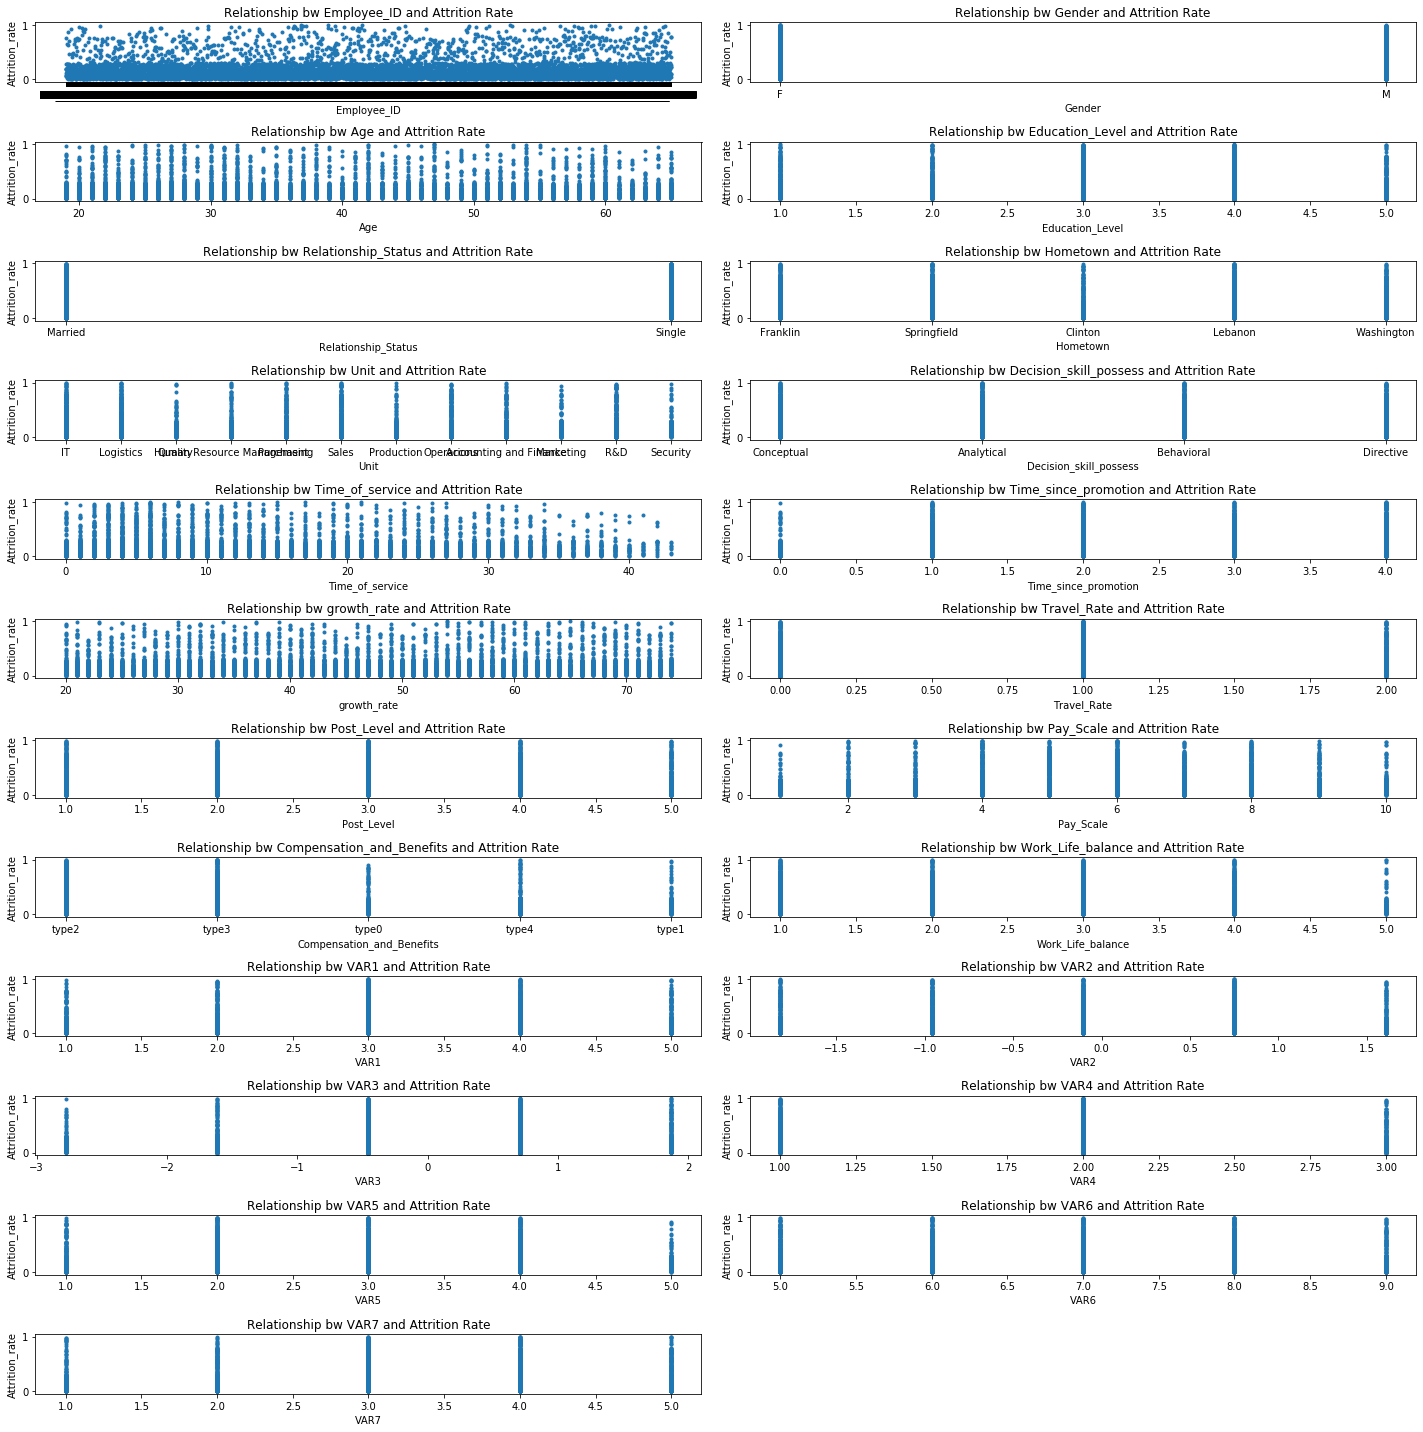

In [7]:
plotFeatures(training_set,"Relationship bw %s and Attrition Rate")

In [238]:
training_set = training_set.drop(['Employee_ID','Education_Level','Time_since_promotion','Post_Level','Work_Life_balance','VAR1','VAR2','VAR3','VAR4','VAR5','VAR6'],axis=1)

In [239]:
training_set.head(5)

,Gender,Age,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,growth_rate,Travel_Rate,Pay_Scale,Compensation_and_Benefits,VAR7,Attrition_rate
0,F,42.0,Married,Franklin,IT,Conceptual,4.0,33,1,7.0,type2,3,0.1841
1,M,24.0,Single,Springfield,Logistics,Analytical,5.0,36,0,6.0,type2,3,0.0670
2,F,58.0,Married,Clinton,Quality,Conceptual,27.0,51,0,8.0,type2,3,0.0851
3,F,26.0,Single,Lebanon,Human Resource Management,Behavioral,4.0,56,1,8.0,type2,3,0.0668
4,F,31.0,Married,Springfield,Logistics,Conceptual,5.0,62,1,2.0,type3,2,0.1827


In [240]:
categorical_features = ['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits']
numerical_features = ['Age','Time_of_service','growth_rate','Travel_Rate','Pay_Scale','VAR7']

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

In [242]:
categorical_transformer = Pipeline([
    ('label', OneHotEncoder())
])

In [243]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
])

In [244]:
transformer_process = ColumnTransformer(
    transformers = [
        ('encode', categorical_transformer, categorical_features),
        ('convert', numerical_transformer, numerical_features)
    ]
)

In [245]:
model = Pipeline([
    ('pre', transformer_process),
    ('knnr', KNeighborsRegressor(n_neighbors=1500))
])

In [246]:
training_set['Attrition_rate'].fillna(training_set['Attrition_rate'].median(skipna = True),inplace = True)

In [247]:
y = training_set['Attrition_rate']
X = training_set.drop(['Attrition_rate'],axis = 1)

In [248]:
X.head(5)

,Gender,Age,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,growth_rate,Travel_Rate,Pay_Scale,Compensation_and_Benefits,VAR7
0,F,42.0,Married,Franklin,IT,Conceptual,4.0,33,1,7.0,type2,3
1,M,24.0,Single,Springfield,Logistics,Analytical,5.0,36,0,6.0,type2,3
2,F,58.0,Married,Clinton,Quality,Conceptual,27.0,51,0,8.0,type2,3
3,F,26.0,Single,Lebanon,Human Resource Management,Behavioral,4.0,56,1,8.0,type2,3
4,F,31.0,Married,Springfield,Logistics,Conceptual,5.0,62,1,2.0,type3,2


In [249]:
y.head(5)

0    0.1841
1    0.0670
2    0.0851
3    0.0668
4    0.1827
Name: Attrition_rate, dtype: float64

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [251]:
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('pre',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encode',
                                                  Pipeline(memory=None,
                                                           steps=[('label',
                                                                   OneHotEncoder(categorical_features=None,
                                                                                 categories=None,
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                               

In [252]:
y_pred = model.predict(X_test)

In [253]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.032631017833078986


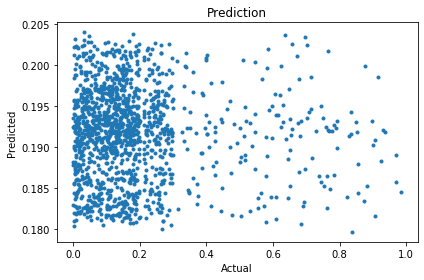

In [254]:
plt.plot(y_test,y_pred,marker='.',linestyle='none')
plt.title("Prediction") 
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()

In [255]:
testing_set = pd.read_csv('Test.csv')
testing_set.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [256]:
testing_set.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [257]:
ids = testing_set['Employee_ID']

In [258]:
testing_set = testing_set.drop(['Employee_ID','Education_Level','Time_since_promotion','Post_Level','Work_Life_balance','VAR1','VAR2','VAR3','VAR4','VAR5','VAR6'],axis=1)

In [259]:
testing_set.isnull().sum()

Gender                         0
Age                          161
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
growth_rate                    0
Travel_Rate                    0
Pay_Scale                      3
Compensation_and_Benefits      0
VAR7                           0
dtype: int64

In [260]:
result = model.predict(testing_set)

In [261]:
print(ids)

0       EID_22713
1        EID_9658
2       EID_22203
3        EID_7652
4        EID_6516
          ...    
2995    EID_22547
2996    EID_10066
2997     EID_7126
2998     EID_4929
2999    EID_24750
Name: Employee_ID, Length: 3000, dtype: object


In [262]:
print(result)

[0.19337533 0.18600747 0.18198573 ... 0.1882328  0.18478313 0.19460647]


In [263]:
formated_result= [ '%.4f' % elem for elem in result]

In [264]:
print(formated_result)

['0.1934', '0.1860', '0.1820', '0.1874', '0.1906', '0.1925', '0.1909', '0.1911', '0.2016', '0.1844', '0.1922', '0.1931', '0.1964', '0.1824', '0.1832', '0.1838', '0.1910', '0.1924', '0.1963', '0.1954', '0.1849', '0.1838', '0.1840', '0.1932', '0.2016', '0.1900', '0.1951', '0.1929', '0.1936', '0.1933', '0.1803', '0.1832', '0.1860', '0.1889', '0.1988', '0.1844', '0.1932', '0.1896', '0.1978', '0.1834', '0.1937', '0.1895', '0.1924', '0.1939', '0.1835', '0.1967', '0.1907', '0.1871', '0.1869', '0.1977', '0.2016', '0.1917', '0.1925', '0.1942', '0.1956', '0.1890', '0.1831', '0.1978', '0.1857', '0.1921', '0.1914', '0.2012', '0.1871', '0.2004', '0.1820', '0.2017', '0.1934', '0.1890', '0.1986', '0.1885', '0.1980', '0.1892', '0.1962', '0.1935', '0.1927', '0.1879', '0.1925', '0.1998', '0.1804', '0.1979', '0.1812', '0.1931', '0.1942', '0.1825', '0.1950', '0.1937', '0.1979', '0.1967', '0.1831', '0.1864', '0.1814', '0.1869', '0.1926', '0.1837', '0.1934', '0.2003', '0.1855', '0.1920', '0.1875', '0.1887',

In [265]:
pd.DataFrame(list(zip(ids,formated_result)),columns=["Employee_ID","Attrition_rate"]).to_csv("submission.csv",index=None)